### 생선의 길이를 사용하여 무게를 예측

In [2]:
import numpy as np

In [3]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

In [5]:
import matplotlib.pyplot as plt

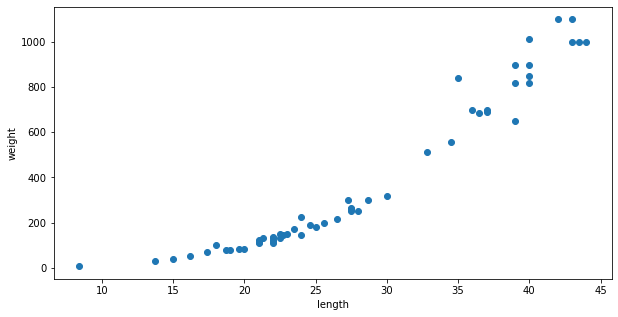

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(fish_length, fish_weight) # fish_length : feature, fish_weight : Target
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### Train Set,Test Set의 분리

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_length, fish_weight, random_state=42 # set.seed 같은 것임
)

> KNN 분류에서 사용되었던 stratify는 분류문제가 아니므로 사용하지 않는다.

In [13]:
# 분리된 결과 확인
print(train_input.shape, test_input.shape)

(42,) (14,)


In [14]:
train_input

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [15]:
# 현재 train_input은 행으로 구성되어있기에 1열로 구성된 배열로 재구성해야된다!
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [18]:
# 2차원 배열로 바뀌었다.
train_input

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [20]:
# pandas가 아니기 때문에 head()를 못쓰고 슬라이싱(slicing) 해줘서 10개를 봐야된다.
train_input[:10]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ]])

In [23]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 회귀모델 사용

In [26]:
# 분류 -> classifier / 회귀 -> regressor
from sklearn.neighbors import KNeighborsRegressor

In [28]:
# 회귀모델 학습시키기
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [29]:
knr.score(test_input, test_target)

0.992809406101064

### 회귀모델은 분류모델처럼 예측값과 정답값을 비교할 수 없다!
### 결정계수($R^2$) : 평균 절대값 오차
$R^2$ = 1 - $(타겟 - 예측)^2$ 의 합 / $(타깃 - 평균)^2$ 의 합

In [34]:
# metrics의 평균 절댓값 오차(mean_absolute_error)

from sklearn.metrics import mean_absolute_error

In [35]:
# 테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


> 오차가 19.157 이기에 정답률이 대충 80% 정도가 된다는 뜻이지 정답률이 80이 아니다!

### 과대적합(Overfitting)과 과소적합(Underfiting)

In [38]:
# train data로 score 측정
knr.score(train_input, train_target)

0.9698823289099254

In [41]:
# test data로 score 측정
knr.score(test_input, test_target)

0.992809406101064

> train보다 test의 점수가 잘 나왔을 경우를 과소적합 이라고 한다.  
> 보통은 train점수가 test의 점수보다 조금 더 잘 나온 과대적합 기준으로 한다.

### KNN 의 Hyper Parameter를 조절

In [46]:
# 이웃의 갯수가 default는 5, 이웃의 갯수를 3으로 줄여야된다.
knr.n_neighbors = 3

# 모델을 다시 훈련합니다.
knr.fit(train_input, train_target)
print("train score:", knr.score(train_input, train_target))
print("test score:", knr.score(test_input, test_target))

train score: 0.9804899950518966
test score: 0.9746459963987609


---
## 이웃의 갯수 조절로 확인

K =====> 1
Train : 0.9852830341215901
Test : 0.991309195814175


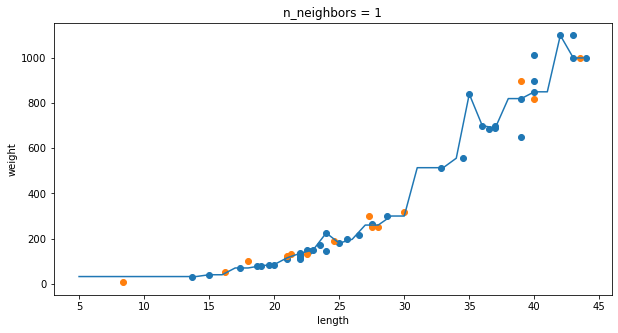

K =====> 3
Train : 0.9804899950518966
Test : 0.9746459963987609


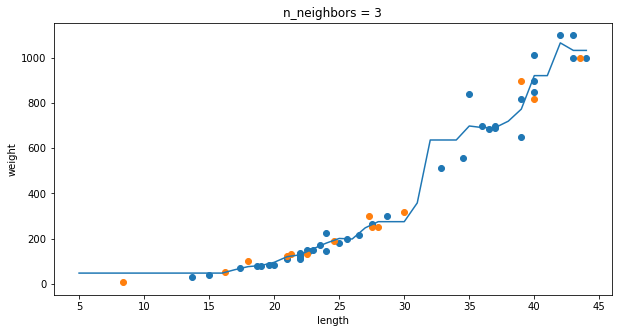

K =====> 5
Train : 0.9698823289099254
Test : 0.992809406101064


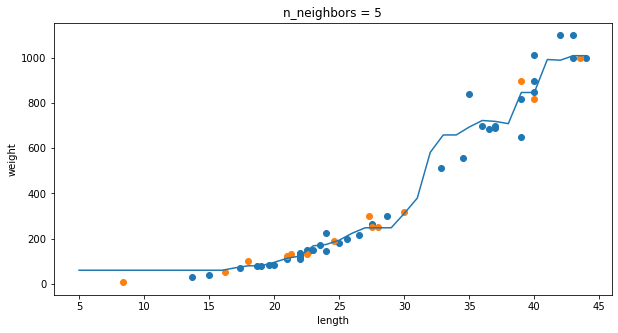

K =====> 10
Train : 0.96164569026043
Test : 0.9737908255822255


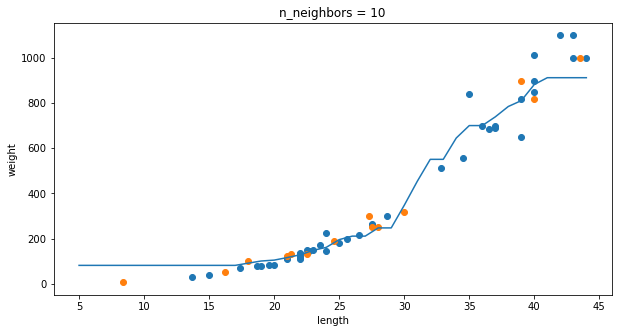

In [50]:
knr = KNeighborsRegressor()

# 5에서 45까지 x 좌표를 만듭니다.(np.max(fish_length)= 44이기 때문)
x = np.arange(5, 45).reshape(-1,1)

# n = 1, 3, 5, 10 일때 예측 결과를 그래프로 그립니다.
for n in [1,3,5,10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print("K =====>", n)
    print("Train :", knr.score(train_input, train_target))
    print("Test :", knr.score(test_input, test_target))

    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

    # 훈련 세트와 검증세트의 예측 결과 그래프 그리기
    plt.figure(figsize=(10,5))
    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = %d'%n)
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

> k = 3 만 빼고는 과소적합입니다.